# Milestone 1

### Loyalty plays a vital role in building a successful business. Among the various forms of loyalty, employee loyalty is arguably the most crucial, as employees are essential to maintaining day-to-day operations and driving growth. When employees feel valued and are motivated to contribute, the results can include greater innovation, higher profitability, and long-term business sustainability. For this project, I aim to examine employee attrition through a more granular lens by analyzing it at the departmental level. Each department may face unique challenges that influence employee turnover, so it is important to provide tailored recommendations that support retention in each specific area.

### To achieve this, I will use employee demographic and performance data to predict attrition by department. In the dataset, attrition is labeled as either "Yes" or "No," making this a binary classification problem. Logistic regression is well-suited for this type of analysis, as it can help identify patterns and relationships between variables that influence an employee’s decision to leave or stay.

### The dataset I will be working with is sourced from Kaggle and includes 10,000 observations across 26 variables. These features include information such as department, job level, average hours worked per week, and number of projects completed. This data will serve as the foundation for the regression model and will help identify which factors most significantly contribute to attrition. By understanding these relationships, the company can focus on improving employee satisfaction in specific areas, ultimately working toward reducing turnover and fostering a more loyal and engaged workforce.



In [141]:
# Import packages and data
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

workers = pd.read_csv('employee_attrition.csv')
workers.head()

,Employee_ID,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,...,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,Attrition
0,1,58,Male,Single,Finance,Manager,5,7332,81,24,...,No,9,48,16,4,1,1,49,3,No
1,2,48,Female,Divorced,HR,Assistant,4,6069,55,18,...,Yes,9,57,10,4,1,1,25,1,No
2,3,34,Female,Married,Marketing,Manager,4,11485,65,6,...,Yes,3,55,1,1,4,3,21,1,Yes
3,4,27,Female,Divorced,HR,Manager,4,18707,28,12,...,No,9,53,2,3,4,1,46,2,No
4,5,40,Male,Married,HR,Analyst,1,16398,92,3,...,No,1,54,11,1,1,1,43,4,No


<Figure size 720x432 with 0 Axes>

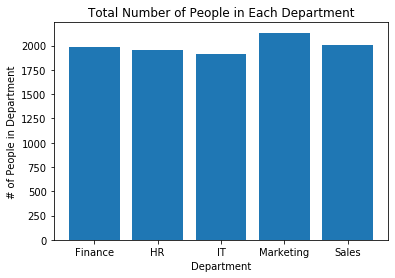

<Figure size 720x432 with 0 Axes>

In [142]:
# Graph 1: Employee spead of the departments
workers['Amount'] = 1
g1 = workers.groupby('Department', as_index=False)['Amount'].sum()
plt.bar(g1['Department'], g1['Amount'])
plt.xlabel('Department')
plt.ylabel('# of People in Department')
plt.title('Total Number of People in Each Department')
plt.figure(figsize=(10,6)) 

### This graph showcases how many people are in each department of the company. There are a total of 10,000 employees in this company and this gives us an idea of the spread of the company. This is just a base graph to see what the people in the company look like. 

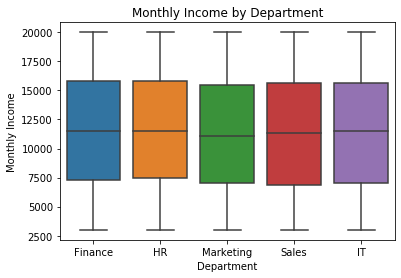

<Figure size 720x432 with 0 Axes>

In [143]:
#G2:Monthly Income by Department
import seaborn as sns
sns.boxplot(data = workers,x="Department",y="Monthly_Income")
plt.title('Monthly Income by Department')
plt.xlabel('Department')
plt.ylabel('Monthly Income')
plt.figure(figsize=(10,6)) 
plt.show()

### This graph tells us what the employees in each department make in each quartile. From this graph we know that the Marketing and Sales employees have the lowestmonthly income on average and in most of the quartiles. This helps gives me something to investage as the monthly income differs a bit. 

C:\Users\14027\OneDrive\Attachments\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\14027\OneDrive\Attachments\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\14027\OneDrive\Attachments\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


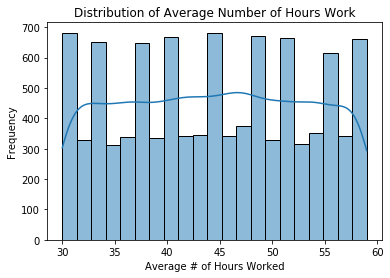

<Figure size 720x432 with 0 Axes>

In [144]:
#G3: Average hours worked per wwke by job level
sns.histplot(workers['Average_Hours_Worked_Per_Week'],kde=True)
plt.title('Distribution of Average Number of Hours Work')
plt.xlabel('Average # of Hours Worked')
plt.ylabel('Frequency')
plt.figure(figsize=(10,6)) 
plt.show()

### This graph shows the average number of hours for all of the employees. This gives an idea of how much time the workers are spending on doing work related content. Here we can see majority of the workers in this company are putting in more than 40 hours a week on work. This tells me that it is really common for everyone to over work a bit is probably not a reason employees attrite. 

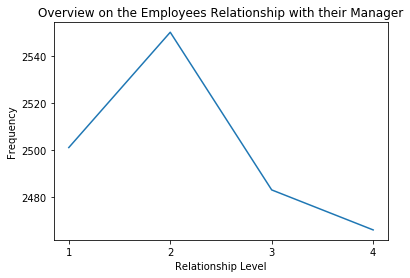

<Figure size 720x432 with 0 Axes>

In [145]:
#G4:Satistfaction histogram
g1 = workers.groupby('Relationship_with_Manager', as_index=False)['Amount'].sum()
plt.plot(g1['Relationship_with_Manager'], g1['Amount'])
plt.title('Overview on the Employees Relationship with their Manager')
plt.xlabel('Relationship Level')
length = 4
xmarks=[i for i in range(1,length+1,1)]
plt.xticks(xmarks)
plt.ylabel('Frequency')
plt.figure(figsize=(10,6)) 
plt.show()

### This graph shows how the employees feel about their realtionship with their manager. From this graph, we can see that most people feel okay about their relationship with their manager. This could be something to look into becuase if there are not good relationship between the leadership and their subordinates then it could be a reason for attrition. 

# Milestone 2

###  The first step I took was to check for null values and fill them in if nesscessary. Luckily, there were no null values which made my life a bit eaiser. Then I plan to drop the Empolyee ID since it adds no value in the binary regression and could create incorrect results. 

In [146]:
# Check for missing values 
workers.isnull().any()
#Drop the column
workers = workers.drop(columns =['Employee_ID'],axis=1)
workers.head()

,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,...,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,Attrition,Amount
0,58,Male,Single,Finance,Manager,5,7332,81,24,12,...,9,48,16,4,1,1,49,3,No,1
1,48,Female,Divorced,HR,Assistant,4,6069,55,18,7,...,9,57,10,4,1,1,25,1,No,1
2,34,Female,Married,Marketing,Manager,4,11485,65,6,4,...,3,55,1,1,4,3,21,1,Yes,1
3,27,Female,Divorced,HR,Manager,4,18707,28,12,9,...,9,53,2,3,4,1,46,2,No,1
4,40,Male,Married,HR,Analyst,1,16398,92,3,9,...,1,54,11,1,1,1,43,4,No,1


### Next, I want to create an age range column instead of having the individual ages. This will help minimize mulitcollinearity, and simplify the model. 

In [147]:
#Addressing the min and max age of all of the workers
print(workers["Age"].min())
print(workers["Age"].max())
# Creating the bins and labels
bins = [20, 30, 40, 50, 60, 100]
labels = ["20-29", "30-39", "40-49", "50-59", "60+"]
#Create the age groups
workers['Age_Group'] = pd.cut(workers['Age'], bins=bins, labels=labels, right = False)
# workers.head()
#Since I check that the new column was calculated properly,
# I will drop the original age column to used the age groups in the model.
workers = workers.drop(columns = ['Age'], axis = 1)
workers.head()

20
59


,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,...,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,Attrition,Amount,Age_Group
0,Male,Single,Finance,Manager,5,7332,81,24,12,3,...,48,16,4,1,1,49,3,No,1,50-59
1,Female,Divorced,HR,Assistant,4,6069,55,18,7,5,...,57,10,4,1,1,25,1,No,1,40-49
2,Female,Married,Marketing,Manager,4,11485,65,6,4,3,...,55,1,1,4,3,21,1,Yes,1,30-39
3,Female,Divorced,HR,Manager,4,18707,28,12,9,1,...,53,2,3,4,1,46,2,No,1,20-29
4,Male,Married,HR,Analyst,1,16398,92,3,9,1,...,54,11,1,1,1,43,4,No,1,40-49


### The next preperation I will do to the dataset is create dummy variables for each of the categorical variable so they can be used in the binary regerssion. 

In [148]:
# Create Dummy Variables for all of the categorical variables to prep for the binary regression. 

def dummy_variables(df, columns):
    df1 = pd.get_dummies(df, columns = columns)
    return df1

workers['Attrition'] = np.where(workers['Attrition'] == 'No', 0, 1)


cat_vari = ['Gender', 'Marital_Status','Job_Role', 'Overtime', 'Age_Group']
# cat_vari1 = ['Department','Gender', 'Marital_Status','Job_Role', 'Overtime', 'Age_Group']
workers_dummy = dummy_variables(workers, cat_vari)
work = dummy_variables(workers, cat_vari)

### Lastly, I am going to split the dataset by department because different attributes may be more/less important in one department when compared to another. I think it will help create a detailed final result that can produce speciallized results for each department. 

In [149]:
workers_dummy['Department'].unique()
# Finance
finance_work = workers_dummy.loc[workers_dummy['Department'] == 'Finance']
# finance_work
#HR
hr_work = workers_dummy.loc[workers_dummy['Department'] == 'HR']
# Sales
sales_work = workers_dummy.loc[workers_dummy['Department'] == 'Sales']
# It
it_work = workers_dummy.loc[workers_dummy['Department'] == 'IT']
# Marketing
marketing_work = workers_dummy.loc[workers_dummy['Department'] == 'Marketing']

## Milestone 3

In [150]:
# Step 1: Add the proper packages to run the logistic model. 
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [151]:
# Step 2: Classify X and Y for each of the datasets. Also creating a constant for the intercept. 
# All Departments
X = work.drop(['Attrition', 'Department'], axis = 1)
Y = work['Attrition']
## Finance
fin_X = finance_work.drop(['Attrition', 'Department'], axis=1)
fin_Y = finance_work['Attrition']
# fin_X = sm.add_constant(fin_X) 
#HR
hr_X = hr_work.drop(['Attrition', 'Department'], axis=1)
hr_Y = hr_work['Attrition']
# hr_X = sm.add_constant(hr_X)
# Sales
sal_X = sales_work.drop(['Attrition', 'Department'], axis=1)
sal_Y = sales_work['Attrition']
# sal_X = sm.add_constant(sal_X)
# It
it_X = it_work.drop(['Attrition', 'Department'], axis=1)
it_Y = it_work['Attrition']
# it_X = sm.add_constant(it_X)
# Marketing
mark_X = marketing_work.drop(['Attrition','Department'], axis=1)
mark_Y = marketing_work['Attrition']
# mark_X = sm.add_constant(mark_X

In [152]:
# Step 3: Next, I'll split the data into a test and training set for each department. 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42) 
X_Ftrain, X_Ftest, y_Ftrain, y_Ftest = train_test_split(fin_X, fin_Y, test_size=0.20, random_state=42) 
X_Htrain, X_Htest, y_Htrain, y_Htest = train_test_split(hr_X, hr_Y, test_size=0.20, random_state=42) 
X_Strain, X_Stest, y_Strain, y_Stest = train_test_split(sal_X, sal_Y, test_size=0.20, random_state=42) 
X_Itrain, X_Itest, y_Itrain, y_Itest = train_test_split(it_X, it_Y, test_size=0.20, random_state=42) 
X_Mtrain, X_Mtest, y_Mtrain, y_Mtest = train_test_split(mark_X, mark_Y, test_size=0.20, random_state=42) 

In [153]:
#Step 4: Fit the Model. I have to add a class weight because without it the model will ignore class = 1.
# Also I going to add a scaler to try and help improve the accuracy
model = LogisticRegression(class_weight='balanced',random_state = 42)
model.fit(X_train, y_train)
model.fit(X_Ftrain, y_Ftrain)   
model.fit(X_Htrain, y_Htrain)   
model.fit(X_Strain, y_Strain)   
model.fit(X_Itrain, y_Itrain)   
model.fit(X_Mtrain, y_Mtrain)   

C:\Users\14027\OneDrive\Attachments\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\14027\OneDrive\Attachments\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_m

LogisticRegression(class_weight='balanced', random_state=42)

In [154]:
#Step 5: Predict the y-values for each of the fitted models
y_pred = model.predict(X_test)
y_Fpred = model.predict(X_Ftest)
y_Hpred = model.predict(X_Htest)
y_Ipred = model.predict(X_Itest)
y_Spred = model.predict(X_Stest)
y_Mpred = model.predict(X_Mtest)

In [155]:
# Step 6: Showcase the result for each department and provide conclusions. 
# All Department
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
auc = roc_auc_score(y_test, y_pred)
print(f"AUC: {auc}")

Confusion Matrix:
 [[823 769]
 [194 214]]
              precision    recall  f1-score   support

           0       0.81      0.52      0.63      1592
           1       0.22      0.52      0.31       408

    accuracy                           0.52      2000
   macro avg       0.51      0.52      0.47      2000
weighted avg       0.69      0.52      0.56      2000

AUC: 0.5207348014582717


In [156]:
## Finance
print("Confusion Matrix:\n", metrics.confusion_matrix(y_Ftest, y_Fpred))
print(classification_report(y_Ftest, y_Fpred))
auc = roc_auc_score(y_Ftest, y_Fpred)
print(f"AUC: {auc}")

Confusion Matrix:
 [[142 165]
 [ 46  45]]
              precision    recall  f1-score   support

           0       0.76      0.46      0.57       307
           1       0.21      0.49      0.30        91

    accuracy                           0.47       398
   macro avg       0.48      0.48      0.44       398
weighted avg       0.63      0.47      0.51       398

AUC: 0.4785231055589362


In [157]:
## HR
print("Confusion Matrix:\n", metrics.confusion_matrix(y_Htest, y_Hpred))
print(classification_report(y_Htest, y_Hpred))

Confusion Matrix:
 [[151 152]
 [ 41  47]]
              precision    recall  f1-score   support

           0       0.79      0.50      0.61       303
           1       0.24      0.53      0.33        88

    accuracy                           0.51       391
   macro avg       0.51      0.52      0.47       391
weighted avg       0.66      0.51      0.55       391



In [158]:
#IT
print("Confusion Matrix:\n", metrics.confusion_matrix(y_Itest, y_Ipred))
print(classification_report(y_Itest, y_Ipred))

Confusion Matrix:
 [[161 165]
 [ 21  37]]
              precision    recall  f1-score   support

           0       0.88      0.49      0.63       326
           1       0.18      0.64      0.28        58

    accuracy                           0.52       384
   macro avg       0.53      0.57      0.46       384
weighted avg       0.78      0.52      0.58       384



## Fianl Analysis of Logistic Regression

After creating running the model on each department as well as all of them together, I found that the logistic regression is not the right model for this project. I check all of the departments, Finance, HR, and IT. I found that the accuracy for the models is very low and has similar odds to a coin flip, around 50%. Also I ran an AUC score for all of the departments and the finance department and they were both very low at around 0.50. This would indicate the model isn't a good fit for the dataset. Therefore, I want to try a different model to try and get a better acuracy for predicting attrition rates. My next model will be Random Forest. 

## Random Forest

I decided to use this instead because I still plan to use the same X and Y values for the decision trees. 

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.inspection import permutation_importance

In [160]:
#  Creating and training the classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf.fit(X_Ftrain, y_Ftrain)   
rf.fit(X_Htrain, y_Htrain)   
rf.fit(X_Strain, y_Strain)   
rf.fit(X_Itrain, y_Itrain)   
rf.fit(X_Mtrain, y_Mtrain)   

RandomForestClassifier(random_state=42)

In [161]:
# Creating the predictions
y_predrf = rf.predict(X_test)
y_Fpredrf = rf.predict(X_Ftest)
y_Hpredrf = rf.predict(X_Htest)
y_Ipredrf = rf.predict(X_Itest)
y_Spredrf = rf.predict(X_Stest)
y_Mpredrf = rf.predict(X_Mtest)

In [162]:
# Confusion Matrix
# all Departments
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_predrf))
print("Classification Report:\n",classification_report(y_test, y_predrf))
# print("Accuracy Score: \n", accuracy_score(y_test, y_predrf))

Confusion Matrix:
 [[1592    0]
 [ 343   65]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90      1592
           1       1.00      0.16      0.27       408

    accuracy                           0.83      2000
   macro avg       0.91      0.58      0.59      2000
weighted avg       0.86      0.83      0.77      2000



In [163]:
# Finance y_Ftest, y_Fpred
print("Confusion Matrix:\n", metrics.confusion_matrix(y_Ftest, y_Fpredrf))
print("Classification Report:\n",classification_report(y_Ftest, y_Fpredrf))

Confusion Matrix:
 [[307   0]
 [ 91   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      1.00      0.87       307
           1       0.00      0.00      0.00        91

    accuracy                           0.77       398
   macro avg       0.39      0.50      0.44       398
weighted avg       0.59      0.77      0.67       398



C:\Users\14027\OneDrive\Attachments\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\14027\OneDrive\Attachments\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\14027\OneDrive\Attachments\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [164]:
# HR
print("Confusion Matrix:\n", metrics.confusion_matrix(y_Htest, y_Hpredrf))
print("Classification Report:\n",classification_report(y_Htest, y_Hpredrf))

Confusion Matrix:
 [[303   0]
 [ 88   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      1.00      0.87       303
           1       0.00      0.00      0.00        88

    accuracy                           0.77       391
   macro avg       0.39      0.50      0.44       391
weighted avg       0.60      0.77      0.68       391



C:\Users\14027\OneDrive\Attachments\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\14027\OneDrive\Attachments\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\14027\OneDrive\Attachments\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [165]:
# IT
print("Confusion Matrix:\n", metrics.confusion_matrix(y_Itest, y_Ipredrf))
print("Classification Report:\n",classification_report(y_Itest, y_Ipredrf))


Confusion Matrix:
 [[326   0]
 [ 58   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       326
           1       0.00      0.00      0.00        58

    accuracy                           0.85       384
   macro avg       0.42      0.50      0.46       384
weighted avg       0.72      0.85      0.78       384



C:\Users\14027\OneDrive\Attachments\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\14027\OneDrive\Attachments\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\14027\OneDrive\Attachments\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [166]:
#Sales 
print("Confusion Matrix:\n", metrics.confusion_matrix(y_Stest, y_Spredrf))
print("Classification Report:\n",classification_report(y_Stest, y_Spredrf))


Confusion Matrix:
 [[323   0]
 [ 79   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89       323
           1       0.00      0.00      0.00        79

    accuracy                           0.80       402
   macro avg       0.40      0.50      0.45       402
weighted avg       0.65      0.80      0.72       402



C:\Users\14027\OneDrive\Attachments\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\14027\OneDrive\Attachments\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\14027\OneDrive\Attachments\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [167]:
# Marketing
print("Confusion Matrix:\n", metrics.confusion_matrix(y_Mtest, y_Mpredrf))
print("Classification Report:\n",classification_report(y_Mtest, y_Mpredrf))


Confusion Matrix:
 [[339   0]
 [ 88   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      1.00      0.89       339
           1       0.00      0.00      0.00        88

    accuracy                           0.79       427
   macro avg       0.40      0.50      0.44       427
weighted avg       0.63      0.79      0.70       427



C:\Users\14027\OneDrive\Attachments\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\14027\OneDrive\Attachments\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\14027\OneDrive\Attachments\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Training and evaluating model for dataset 'Full'
Dataset Full - Feature: Job_Level, Score: 0.03212
Dataset Full - Feature: Monthly_Income, Score: 0.08201
Dataset Full - Feature: Hourly_Rate, Score: 0.07087
Dataset Full - Feature: Years_at_Company, Score: 0.06190
Dataset Full - Feature: Years_in_Current_Role, Score: 0.05571
Dataset Full - Feature: Years_Since_Last_Promotion, Score: 0.04254
Dataset Full - Feature: Work_Life_Balance, Score: 0.02827
Dataset Full - Feature: Job_Satisfaction, Score: 0.03209
Dataset Full - Feature: Performance_Rating, Score: 0.02534
Dataset Full - Feature: Training_Hours_Last_Year, Score: 0.07061
Dataset Full - Feature: Project_Count, Score: 0.04718
Dataset Full - Feature: Average_Hours_Worked_Per_Week, Score: 0.06399
Dataset Full - Feature: Absenteeism, Score: 0.05683
Dataset Full - Feature: Work_Environment_Satisfaction, Score: 0.02888
Dataset Full - Feature: Relationship_with_Manager, Score: 0.02790
Dataset Full - Feature: Job_Involvement, Score: 0.02802


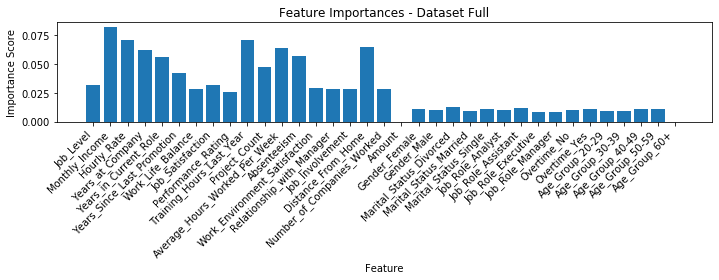

In [177]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# List of dataset name pairs (train features and labels)
datasets = [("Full", X_train, y_train),
#     ('F', X_Ftrain, y_Ftrain),
#     ('H', X_Htrain, y_Htrain),
#     ('S', X_Strain, y_Strain),
#     ('I', X_Itrain, y_Itrain),
#     ('M', X_Mtrain, y_Mtrain)
]

# Loop through each dataset
for name, X_train, y_train in datasets:
    print(f"\nTraining and evaluating model for dataset '{name}'")

    # Train model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Get feature importances
    importance = rf.feature_importances_

    # Use feature names if available
    if hasattr(X_train, 'columns'):
        feature_names = X_train.columns
    else:
        feature_names = [f'Feature {i}' for i in range(X_train.shape[1])]

    # Print feature importances
    for name_, score in zip(feature_names, importance):
        print(f'Dataset {name} - Feature: {name_}, Score: {score:.5f}')

    # Plot with feature names
    plt.figure(figsize=(10, 4))
    plt.bar(feature_names, importance)
    plt.title(f'Feature Importances - Dataset {name}')
    plt.xlabel('Feature')
    plt.ylabel('Importance Score')
    plt.xticks(rotation=45, ha='right')  # Rotate x labels for readability
    plt.tight_layout()
    plt.show()
